# EXERCICIO 1

## Gerar pools homogêneos de classificadores usando Bagging e Random Subspace (50%).

- Usar 10-fold cross-validation.
- Treinar os classificadores-base com {50, 60, …, 100} porcento do conjunto de
treinamento.
- Pool com 100 classificadores.
- Combinar os classificadores usando voto majoritário.
- Utilizar as medidas: taxa de acerto, AUC, g-mean e f-measure.

## Os classificadores-base são: 
- Perceptron 
- Árvore de Decisão. 

## Descrição das Bases de Dados:

- Os dois conjuntos de dados escolhidos são chamados de kc1 e kc2, ambos com dados sobre detecção de falha em softwares. As bases escolhidas são binárias e são desbalanceadas, ou seja, possuem apenas duas classes em que a quantidade de exemplos de uma é maior do que a outra.

- A base kc1 possui 2109 observações, sendo 326 para a classe com falhas e 1783 para a classe que não tem falhas. Cada observação possui 22 atributos. Já a base kc2 possui 522 observações, sendo 105 para classe com falhas e 415 para a classe com observações perfeitas. Semelhante a base anterior, cada observação da classe kc2 possui 22 atributos. 

In [43]:
# importando o script que importa os resultados e gera os gráficos
from analise01 import *

In [44]:
# definição das métricas que irão ser avaliadas
metricas = ['acuracy', 'auc', 'fmeasure', 'gmean']

## 1. Comparação Entre Métodos de Subamostragem

A primeira investigação que buscamos analisar nesse documento é sobre as técnicas Bagging e Random Subspace. Com essa análise, pretendemos responder as seguintes perguntas de pesquisa: 
- **Como a quantidade de amostras e a seleção de características influenciam no desempenho dos classificadores gerados?**

Essa seção busca discutir os resultados e entender como a quantidade de amostras e a seleção de características influenciam no desempenho dos classificadores. Os dados pertinentes a assa análise estão distribuídos para as métricas: Accuracy; AUC; F-measure; e G-mean.

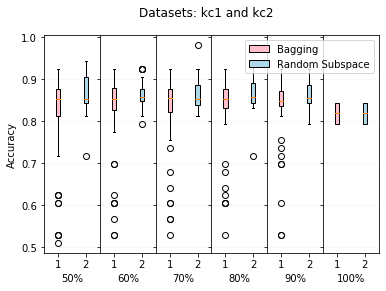

In [45]:
# Figura 1 - Boxplot para acurácia considerando a investigação para Bagging e Random Subspace.
gerar_boxplot_metrica_bgrs_twodata(metricas[0])

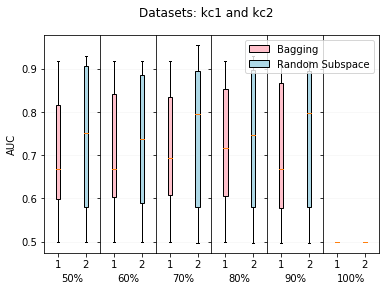

In [46]:
# Figura 2. Boxplot para AUC considerando a investigação para Bagging e Random Subspace.
gerar_boxplot_metrica_bgrs_twodata(metricas[1])

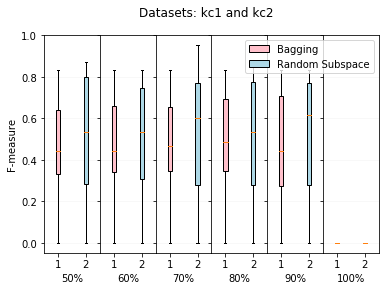

In [47]:
#Figura 3. Boxplot para F-measure considerando a investigação para Bagging e Random Subspace.
gerar_boxplot_metrica_bgrs_twodata(metricas[2])

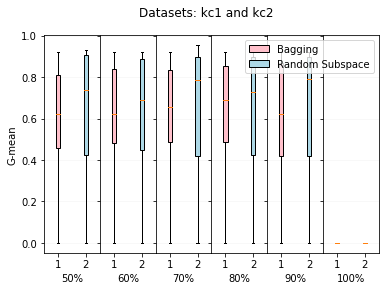

In [48]:
#Figura 4. Boxplot para G-mean considerando a investigação para Bagging e Random Subspace.
gerar_boxplot_metrica_bgrs_twodata(metricas[3])

Ao se observar as figuras 1 a 4 pode-se perceber que o desempenho das técnicas de amostragem não varia quando se altera a quantidade de amostras selecionadas para treinamento. Isso significa que para as bases utilizadas nesse relatório, utilizar poucos dados para treinamento como por exemplo 50%, surte o mesmo efeito que utilizar uma maior quantidade, como por exemplo 90%. Esses resultados mostram que selecionar amostras aleatórias no conjunto de treinamento fornece resultados equivalentes ao se utilizar muitos dados, o que por sua vez pode acelerar o processo de treinamento dos classificadores.

Uma observação bastante importante é quando se utiliza 100% dos dados para treinamento. Ao se utilizar todos os dados no treinamento, isso impossibilita que o Bagging e o Random Subpace extraiam amostras. Se as amostras não são obtidas, isso impossibilita que os classificadores possuam diversidade, o que por sua vez prejudicam o desempenho do sistema. Essa discussão pode ser notada ao se analisar as métricas AUC (figura 2), F-measure (figura 3) e G-mean (figura 4). As métricas AUC e F-measure baseiam-se na acurácia do sistema em classificar os dados corretamente em relação aos erros obtidos. A partir dessas pode-se perceber que o conjunto de classificadores criados não conseguiram ser diversos o suficiente para ter um alto índice de assertividade, uma vez que seus valores ficaram próximos a 0. Outra confirmação pode ser vista na métrica G-mean, o que mostra que o sistema não conseguiu ser eficiente em classificar corretamente as duas classes do problema, desse modo tendo seu desempenho próximo a 0.

Sobre a seleção de características, observou-se que para a métrica Accuracy o método Random Subspace conseguiu ter uma leve melhora em relação ao Bagging, visto que independentemente da quantidade de amostras sua mediana sempre foi um pouco maior que a do Bagging. Em compensação, ao analisarmos o seu desempenho para as métricas AUC, F-measure e G-mean, percebeu-se que sua mediana permanece maior, mas sua variabilidade aumenta. Essa constatação pode ser prejudicial, pois demonstra que a técnica Bagging possui maior consistência e confiança sobre suas classificações.

## 2. Análise Comparativa Entre Decision Tree x Perceptron:

A segunda investigação desse relatório visa discutir a diferença entre os algoritmos: Árvore de Decisão e Perceptron. Através dessa análise pretendemos responder a seguinte pergunta de pesquisa: 

- **Como o procedimento dos algoritmos influenciam nos resultados das técnicas de amostragem?**

Buscamos através dessa análise entender como os classificadores base podem ser importantes para modelarem as amostradas geradas. 

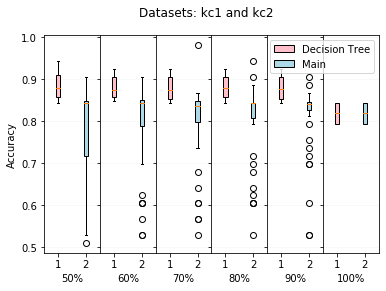

In [49]:
#Figura 5. Boxplot para Accuracy considerando a investigação para Árvore de Decisão e Perceptron.
gerar_boxplot_metrica_dtp_twodata(metricas[0])

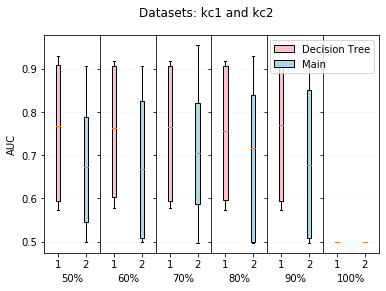

In [50]:
# Figura 6. Boxplot para AUC considerando a investigação para Árvore de Decisão e Perceptron.
gerar_boxplot_metrica_dtp_twodata(metricas[1])

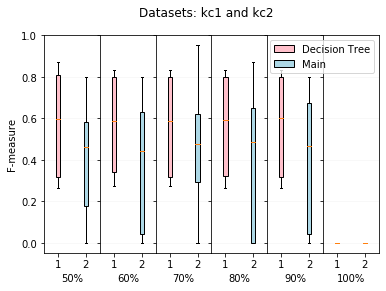

In [51]:
#Figura 7. Boxplot para F-measure considerando a investigação para Árvore de Decisão e Perceptron.
gerar_boxplot_metrica_dtp_twodata(metricas[2])

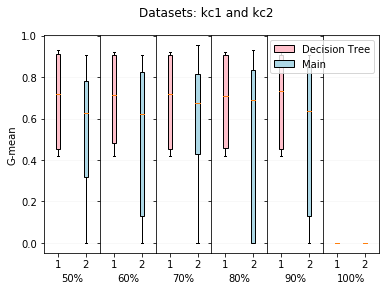

In [52]:
# Figura 8. Boxplot para G-mean considerando a investigação para Árvore de Decisão e Perceptron. 
gerar_boxplot_metrica_dtp_twodata(metricas[3])

Ao observar as figuras de 5 a 8, percebe-se que independente da métrica a ser analisada o classificador base que obteve melhor desempenho foi a Árvore de Decisão. Em algumas métricas como por exemplo Accuracy, observa-se que a melhoria da Árvore de Decisão sobre o Perceptron é significativa, dado que sua mediana é bem superior à do Perceptron. Em outros casos, como por exemplo para as métricas F-measure e G-mean, observa-se também que a variabilidade da Árvore de Decisão é mais consistente que a do Perceptron. Isso significa que as classificações da Árvore de Decisão são mais relevantes e classificam com mais eficiência as duas classes do problema.

Esses resultados se explicam da seguinte maneira:  o Perceptron é um classificador linear, ou seja, só consegue obter bom desempenho em problemas que são linearmente separáveis, o que não é o caso das bases investigadas. Já a Árvore de Decisão, consegue criar conjuntos de regras para mapear os problemas. Essas regras são mais flexíveis que uma reta para classificar observações. Logo, por essa razão a Árvore de Decisão obteve os resultados mais significativos.

## 3.	Análise de Desempenho Individual dos Algoritmos:

Por fim, a última análise deste relatório busca verificar:

- **Qual foi a melhor combinação entre técnica de amostragem x classificador base que obteve o melhor desempenho considerando as duas bases de dados?**

Buscamos através dessa análise verificar qual a melhor combinação paramétrica e algorítmica que obteve o melhor desempenho considerando as duas bases de dados.

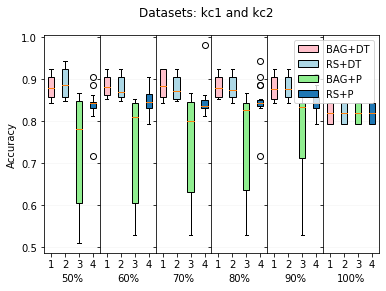

In [53]:
#Figura 9. Boxplot para Accuracy considerando a investigação do melhor algoritmo.
gerar_boxplot_metrica_geral_twodata(metricas[0])

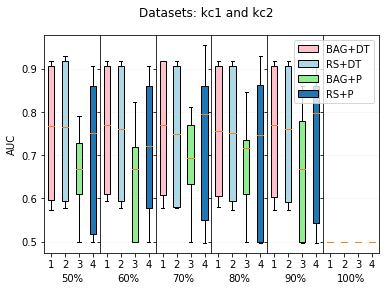

In [54]:
#Figura 10. Boxplot para AUC considerando a investigação do melhor algoritmo.
gerar_boxplot_metrica_geral_twodata(metricas[1])

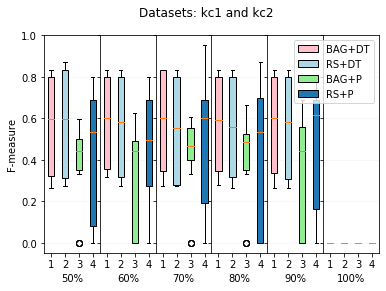

In [55]:
#Figura 11. Boxplot para F-measure considerando a investigação do melhor algoritmo.
gerar_boxplot_metrica_geral_twodata(metricas[2])

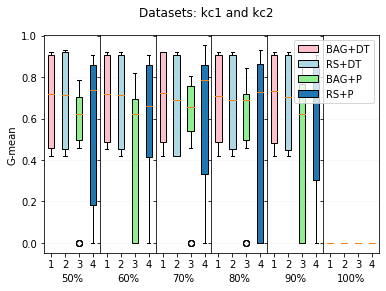

In [56]:
# Figura 12. Boxplot para G-mean considerando a investigação do melhor algoritmo.
gerar_boxplot_metrica_geral_twodata(metricas[3])

Como nas seções anteriores pode-se observar que a Árvore de Decisão obteve os melhores resultados e que o Random Subpace apresentou uma leve melhora em relação ao Bagging. As discussões nesta seção serão pertinentes apenas a quantidade de amostras que obteve os melhores resultados.

Ao se observar a figura 9, que traz a métrica Accuracy, observa-se que a combinação de Random Subspace + Árvore de Decisão para 50% das amostras obteve a melhor mediana de todos os quadros, o que por sua vez confirmam as discussões passadas. Esse desempenho pode ser fortalecido ao se analisar as métricas AUC, F-measure e G-mean, pois o mesmo padrão se repete, obtendo assim o melhor desempenho geral, considerando todas as métricas.

# Conclusões

Este relatório teve como objetivo apresentar os resultados obtidos para lista de exercício 01 da disciplina de Sistemas de Múltiplos Classificadores. Os experimentos foram realizados utilizando as técnicas de amostragem: Bagging e Random Subspace em conjunto com os classificadores bases: Árvore de Decisão e Perceptron. Cada combinação foi experimentada para diferentes quantidades de amostras utilizadas para treinamento.

Sobre a quantidade de amostras utilizadas para treinamento, observou-se que utilizar poucas amostras (50%) resulta no mesmo desempenho que utilizar grandes amostras (90%). O que por sua vez pode ser benéfico para o tempo de geração dos classificadores. Observou-se também que utilizar 100% dos dados para treinamento prejudica o desempenho do sistema, pois não possibilita a extração de amostras.

Sobre as técnicas de amostragem, observou-se que a técnica Random Subspace obteve uma leve melhora em relação ao Bagging. Esse resultado é dado pela capacidade do Random Subspace apresentar mais diversidade aos classificadores base, uma vez que ele seleciona características aleatórias das observações. Em contrapartida, observou-se que a técnica Bagging possui menor variabilidade dos seus resultados.

Sobre os classificadores base, observou-se que para as bases de dados deste trabalho, a Árvore de decisão foi mais eficiente, considerando todas as métricas discutidas. Os resultados apontam que as regras de decisão geradas pela Árvore são mais flexíveis que a reta gerada pelo Perceptron.

Por fim, obteve-se que a melhor configuração paramétrica para as bases investigadas foi utilizando o Random Subspace com classificador Árvore de decisão, utilizando 50% das amostras para treinamento, o que por sua vez confirmam as discussões anteriores. 
